In [1]:
import serial
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft
import numpy as np
%matplotlib inline

# plt.rcParams["figure.figsize"] = (32,3)

In [15]:
ser = serial.Serial('/dev/ttyACM1', 9600)
# ser = serial.Serial('/dev/ttyUSB0', 9600)

x = []
y = []
N = 100
count = 0
# plt.stem(x, y, use_line_collection=True)

  # valor_Corrente = maior_Valor * 0.004882812;
  # valor_Corrente = valor_Corrente - 2.47;
  # valor_Corrente = valor_Corrente * 1000;
  # valor_Corrente = valor_Corrente / 185;         #sensibilidade : 66mV/A para ACS712 30A / 185mV/A para ACS712 5A
  # valor_Corrente = valor_Corrente / 1.41421356;
while count < N:
    cc=str(ser.readline())
    newCC = cc[2:][:-5]

    ccSplited = newCC.split(';')
    y.append(float(ccSplited[0]))
    x.append(float(ccSplited[1]) / 10000000)
    # print(count)
    # print(float(ccSplited[0]))
    count = count + 1

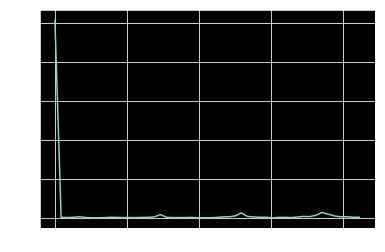

In [16]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 100

# sample spacing

T = 1.0/8620.0

x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()